In [1]:
##Importing the packages
from time import time
#Data processing packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Machine Learning packages
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier, LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
laptop_price = pd.read_csv('laptop_price.csv', encoding='latin-1')
laptop_price.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
laptop_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# Convert from categorical data to Numerical data


In [4]:
laptop_price = pd.get_dummies(laptop_price)
print(laptop_price.shape)
laptop_price.head()

(1303, 1150)


,laptop_ID,Inches,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Weight_4.2kg,Weight_4.33kg,Weight_4.36kg,Weight_4.3kg,Weight_4.42kg,Weight_4.4kg,Weight_4.5kg,Weight_4.6kg,Weight_4.7kg,Weight_4kg
0,1,13.3,1339.69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,13.3,898.94,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,15.6,575.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15.4,2537.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,13.3,1803.60,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create a feature and target set


In [5]:
X = laptop_price.drop(['Price_euros'], axis=1)
y = laptop_price['Price_euros']

# Scalling data values to standardize range

In [6]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

# Split data into 'Train' and 'Test'

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 52)
print('Training set', X_train.shape, y_train.shape)
print('Testing set', X_test.shape, y_test.shape)

Training set (1042, 1149) (1042,)
Testing set (261, 1149) (261,)


# Regression Function

In [8]:
def regression(model, model_name, X_train, y_train):
    start_time = time()  # Record start time
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_score = model.score(X_test,y_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    plt.figure()
    plt.plot(y_test, y_test)
    plt.scatter(y_test, y_pred, s=10, c="red")
    pred_clf = model.predict(X_test)
    plt.title(f"{model_name} : R2_score = {round(r2_score,2)}, MAE = {round(mae,2)}, RMSE = {round(rmse,2)}")
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.show()
    end_time = time()  # Record end time
    execution_time = end_time - start_time  # Calculate execution time
    return r2_score, mae, rmse, execution_time

In [9]:
results_df = pd.DataFrame(columns=['model_name', 'r2_score', 'mae', 'rmse', 'execution_time'])

# Linear regression

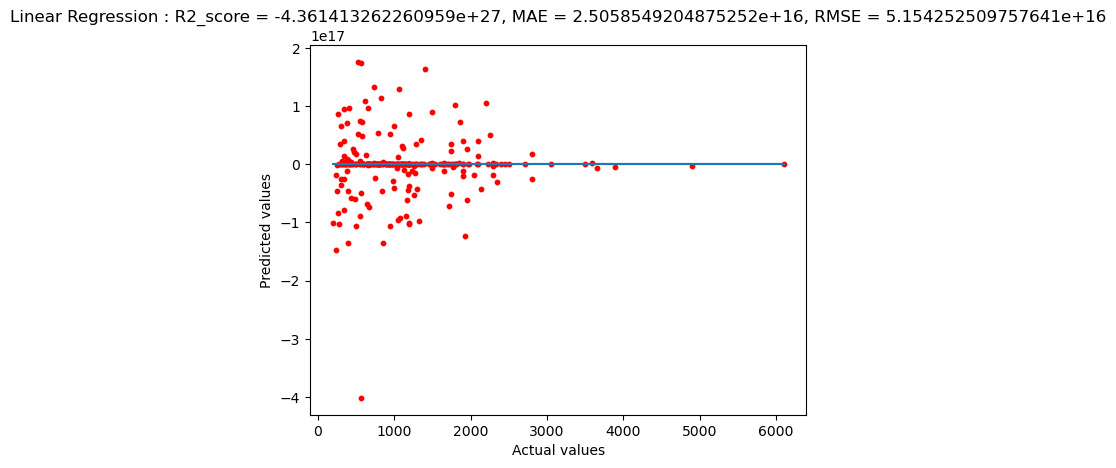

,model_name,r2_score,mae,rmse,execution_time
0,Linear Regression,-4.361413e+27,2.505855e+16,5.154253e+16,0.85162


In [10]:
model = LinearRegression() 
model_name = "Linear Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results_df = results_df.append({'model_name': model_name, 'r2_score': r2_score, 'mae': mae, 'rmse': rmse, 'execution_time':execution_time}, ignore_index=True)
results_df

# Polynomial Regression

In [11]:
#This code is commented as it is taking long time.  Uncomment if you want to run it.
#degree =  2 # You can adjust the degree as needed
#model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
#model_name = "Polynomial Regression"
#r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
#results_df = results_df.append({'model_name': model_name, 'r2_score': r2_score, 'mae': mae, 'rmse': rmse, 'execution_time':execution_time}, ignore_index=True)
#results_df

# Random Forest Regression

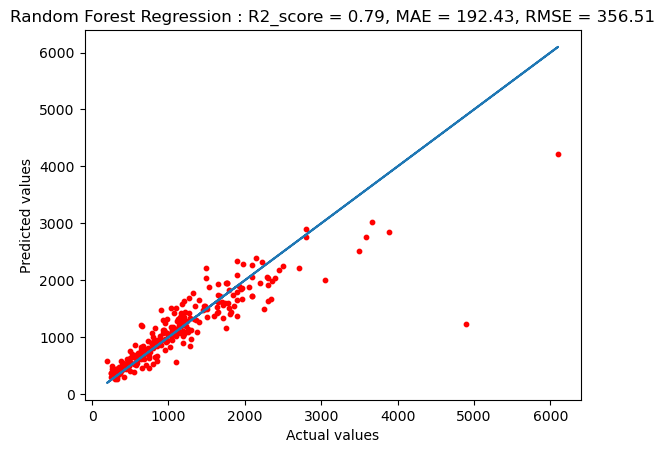

,model_name,r2_score,mae,rmse,execution_time
0,Linear Regression,-4.361413e+27,2.505855e+16,5.154253e+16,0.851620
1,Random Forest Regression,7.913385e-01,1.924323e+02,3.565113e+02,8.116791


In [12]:
model = RandomForestRegressor(random_state=0)
model_name = "Random Forest Regression"
r2_score, mae, rmse, execution_time = regression(model, model_name, X_train, y_train)
results_df = results_df.append({'model_name': model_name, 'r2_score': r2_score, 'mae': mae, 'rmse': rmse, 'execution_time':execution_time}, ignore_index=True)
results_df